In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_egcn = pd.read_csv('res/egcn.csv')
df_edgebank = pd.read_csv('res/edgebank.csv')
df_dysat = pd.read_csv('res/dysat.csv')
df_stgcn = pd.read_csv('res/stgcn.csv')
df_gclstm = pd.read_csv('res/gclstm.csv')

In [7]:
df_egcn.columns

Index(['W', 'CanParl', 'USLegis', 'Trade', 'UCI-Message', 'UNVote', 'AS733',
       'Enron', 'Colab', 'Bitcoin-OTC', 'Bitcoin-Alpha'],
      dtype='object')

## Window size effect 

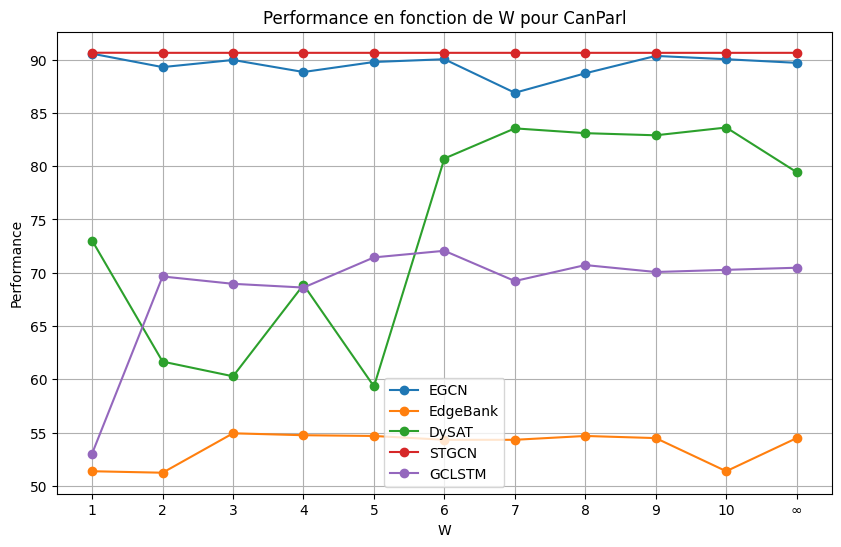

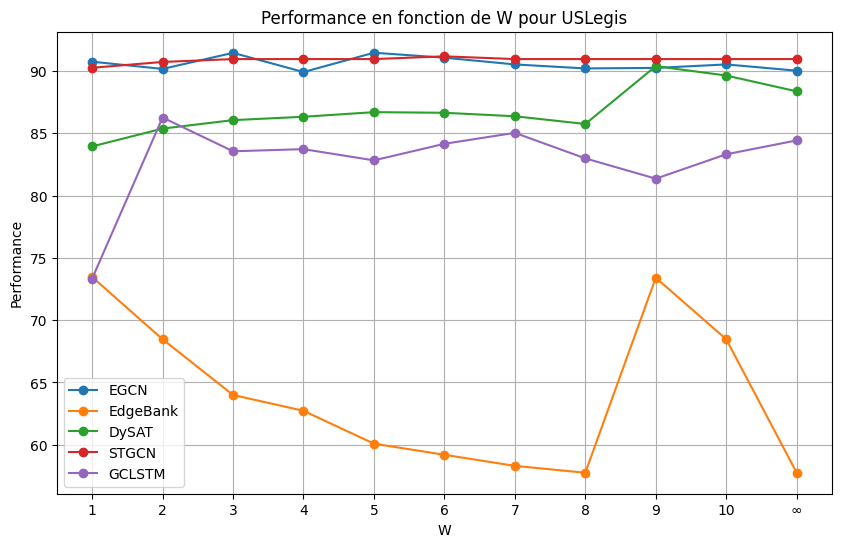

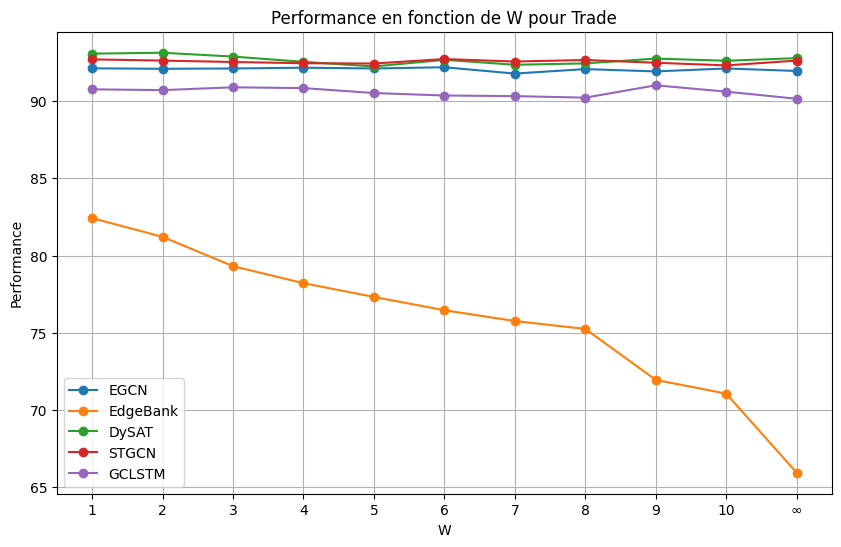

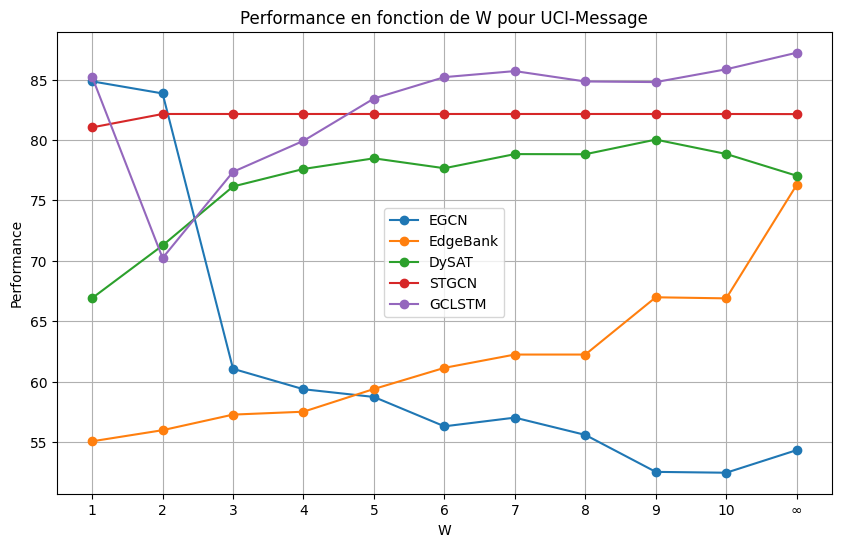

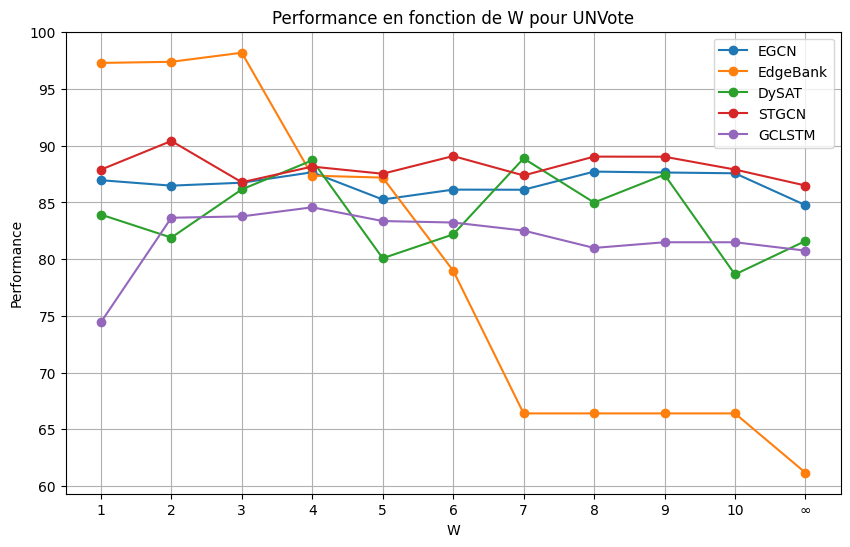

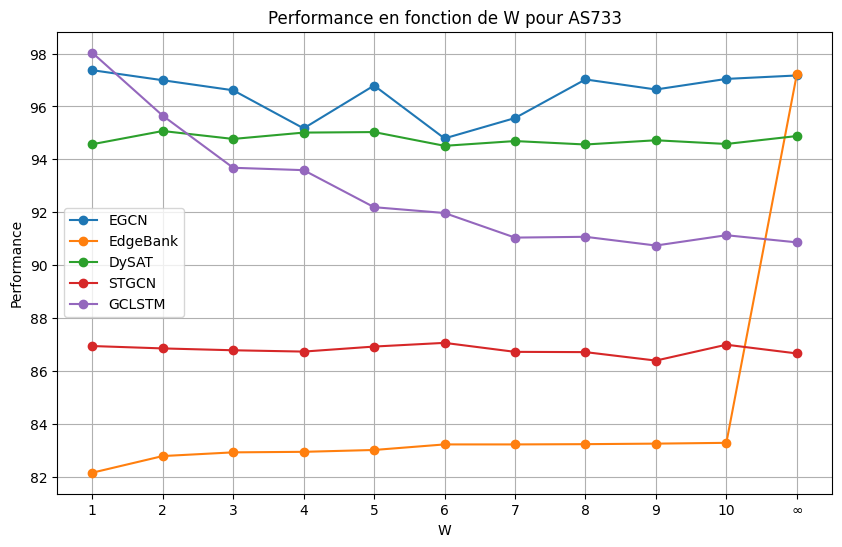

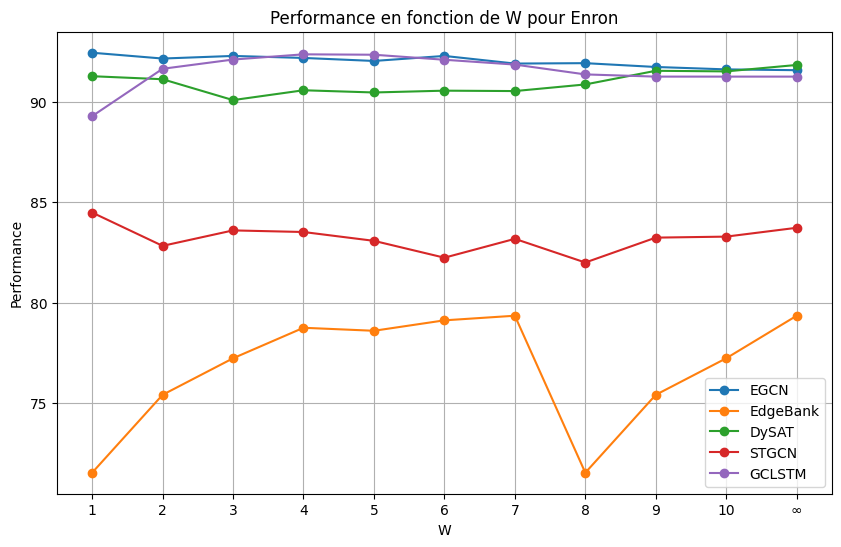

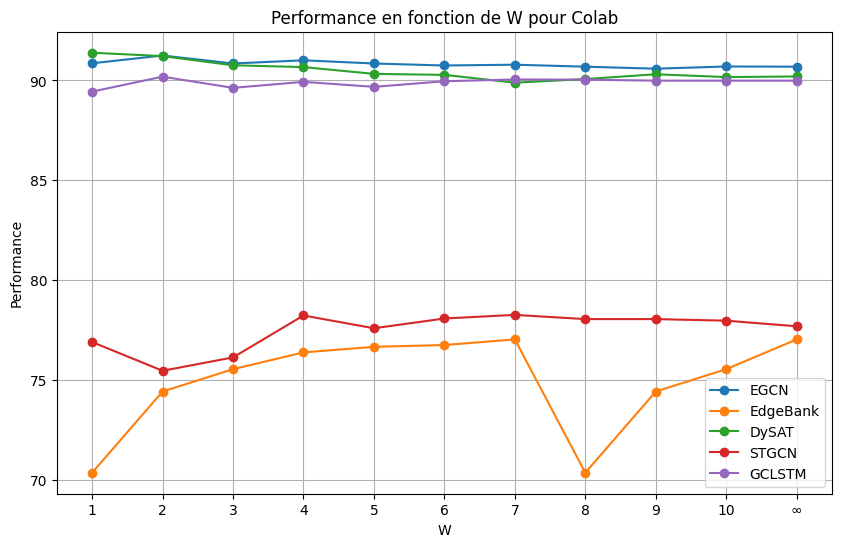

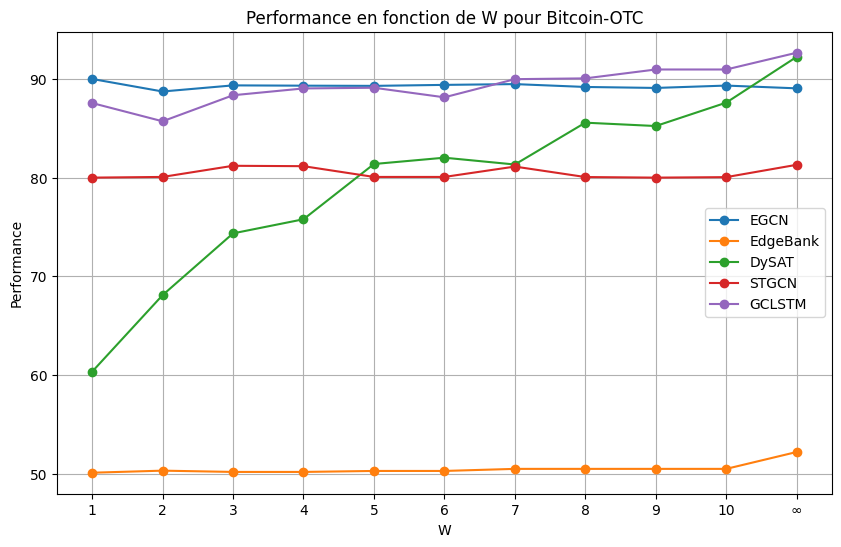

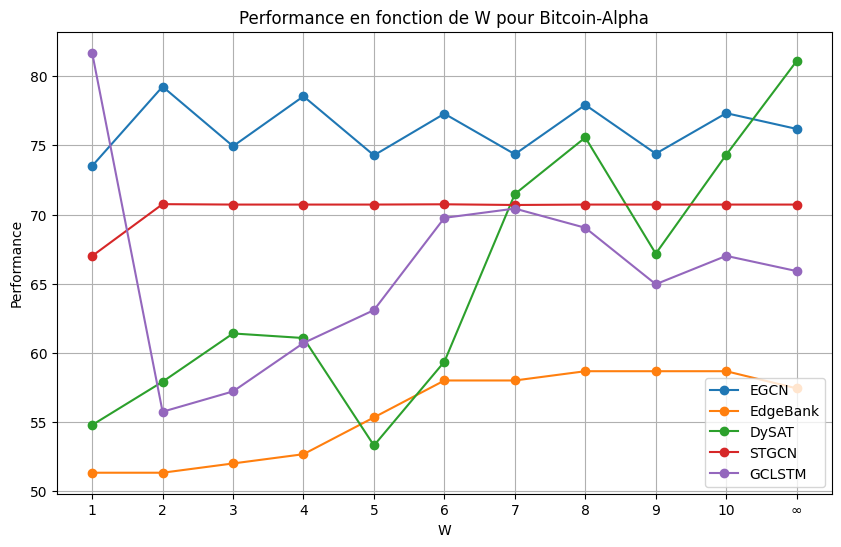

In [8]:
models = {
    'EGCN': df_egcn,
    'EdgeBank': df_edgebank,
    'DySAT': df_dysat,
    'STGCN': df_stgcn,
    'GCLSTM': df_gclstm
}

# Liste des datasets
datasets = df_egcn.columns[1:]

# Tracer les courbes pour chaque dataset
for dataset in datasets:
    plt.figure(figsize=(10, 6))
    
    for model_name, df in models.items():
        x = df['W'].replace(-1, 11)
        y = df[dataset]
        plt.plot(x, y, marker='o', label=model_name)
    
    plt.xticks(list(range(1, 11)) + [11], list(range(1, 11)) + ['∞'])
    plt.xlabel('W')
    plt.ylabel('Performance')
    plt.title(f'Performance en fonction de W pour {dataset}')
    plt.legend()
    plt.grid(True)
    plt.show()

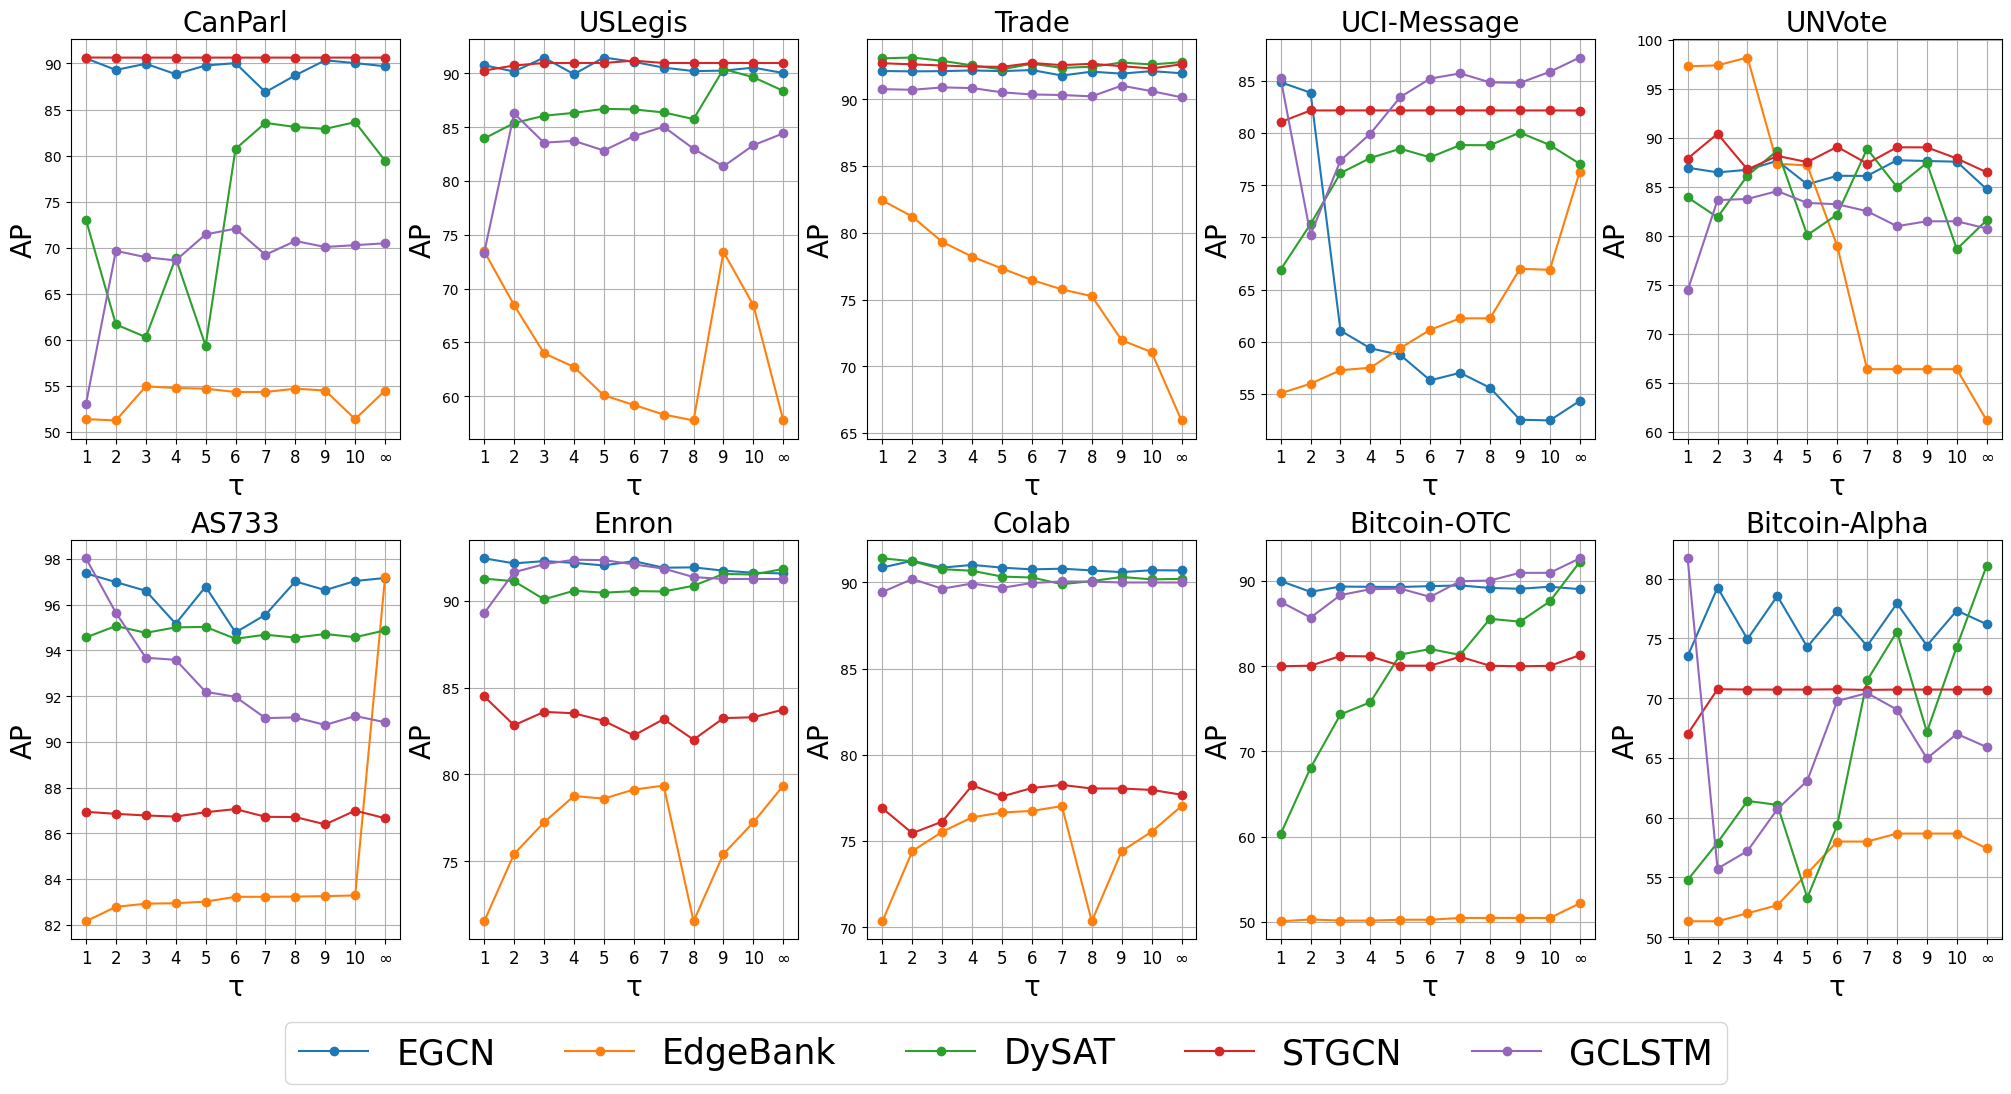

In [9]:
models = {
    'EGCN': df_egcn,
    'EdgeBank': df_edgebank,
    'DySAT': df_dysat,
    'STGCN': df_stgcn,
    'GCLSTM': df_gclstm
}

# Liste des datasets
datasets = df_egcn.columns[1:]

# Créer les sous-graphes
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Flattener les axes pour itérer facilement
axes = axes.flatten()

# Tracer les courbes pour chaque dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    
    for model_name, df in models.items():
        x = df['W'].replace(-1, 11)
        y = df[dataset]
        ax.plot(x, y, marker='o', label=model_name)
    
    ax.set_xticks(list(range(1, 11)) + [11])
    ax.set_xticklabels(list(range(1, 11)) + ['∞'], fontsize=12)
    ax.set_xlabel('τ', fontsize=20)
    ax.set_ylabel('AP', fontsize=20)
    ax.set_title(dataset, fontsize=20)
    ax.grid(True)

# Ajuster la légende
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=25, bbox_to_anchor=(0.5, 0.0), ncol=5)

# Ajuster les tailles de police globales
plt.rcParams.update({'font.size': 14})

plt.show()

## Tau optimal vs Tau all 

/tmp/ipykernel_28638/2783515079.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


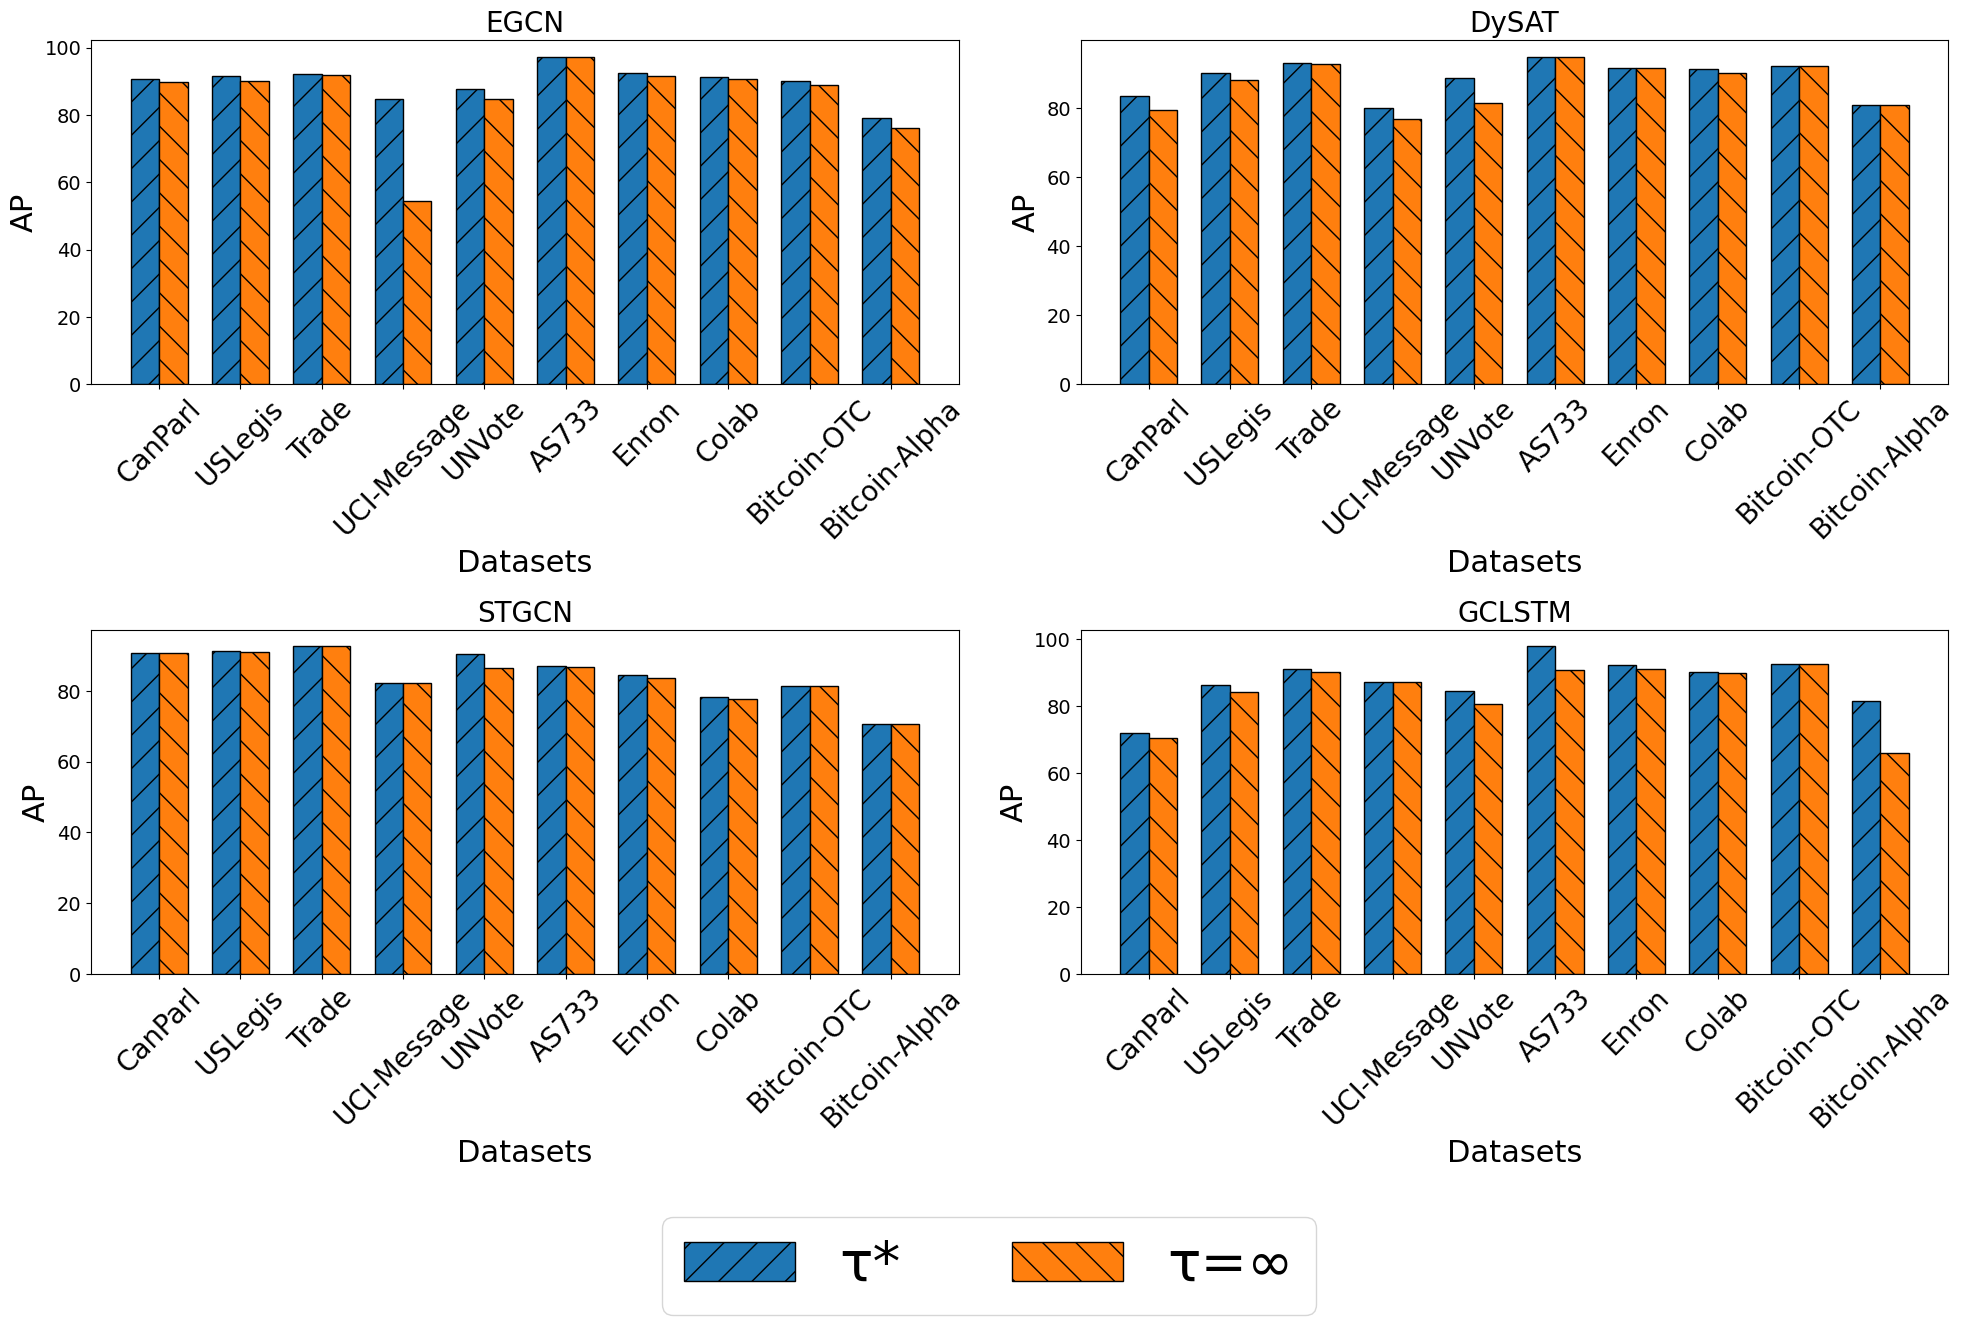

In [10]:

# Charger les données
df_egcn = pd.read_csv('res/egcn.csv')
df_dysat = pd.read_csv('res/dysat.csv')
df_stgcn = pd.read_csv('res/stgcn.csv')
df_gclstm = pd.read_csv('res/gclstm.csv')

# Préparer les données pour chaque modèle
models = {
    'EGCN': df_egcn,
    'DySAT': df_dysat,
    'STGCN': df_stgcn,
    'GCLSTM': df_gclstm
}

# Liste des datasets
datasets = df_egcn.columns[1:]

# Calculer les valeurs optimales et W=all pour chaque modèle et chaque dataset
optimal_values = {model: [] for model in models}
all_values = {model: [] for model in models}

for model_name, df in models.items():
    for dataset in datasets:
        optimal_values[model_name].append(df[dataset].max())
        all_values[model_name].append(df[df['W'] == -1][dataset].values[0])

# Créer les sous-graphes pour chaque modèle
fig, axes = plt.subplots(2, 2, figsize=(20, 12), constrained_layout=True)

# Flattener les axes pour itérer facilement
axes = axes.flatten()

bar_width = 0.35
index = np.arange(len(datasets))

colors = ['#1f77b4', '#ff7f0e']  # Couleurs plus vives
hatches = ['/', '\\']  # Motifs pour les barres

for i, (model_name, ax) in enumerate(zip(models.keys(), axes)):
    bars1 = ax.bar(index, optimal_values[model_name], bar_width, label='τ*', color=colors[0], hatch=hatches[0], edgecolor='black')
    bars2 = ax.bar(index + bar_width, all_values[model_name], bar_width, label='τ=∞', color=colors[1], hatch=hatches[1], edgecolor='black')
    
    ax.set_xlabel('Datasets', fontsize=22)
    ax.set_ylabel('AP', fontsize=22)
    ax.set_title(f'{model_name}', fontsize=20)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(datasets, rotation=45,fontsize=20)

# Ajuster la légende pour qu'elle soit au centre
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=40, bbox_to_anchor=(0.5, 0.), ncol=2)

plt.tight_layout()
plt.show()

## Correlation long datasets and all performance

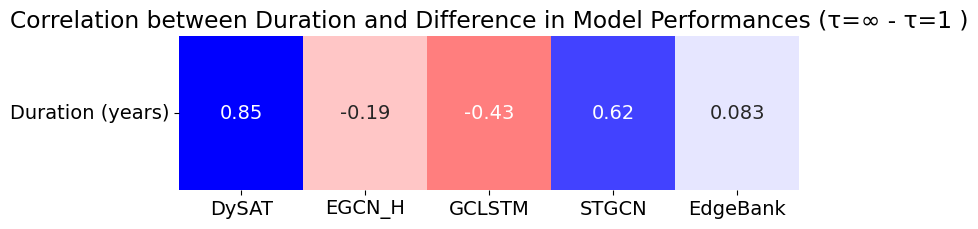

In [16]:
dataset_info = {
    'Dataset': ['CanParl', 'USLegis', 'Trade', 'UCI-Message', 'UNVote', 'AS733', 'Enron', 'Colab', 'Bitcoin-OTC', 'Bitcoin-Alpha'],
    'Duration (years)': [14, 12, 32, 88, 72, 30, 11, 10, 136, 136]
}
df_duration = pd.DataFrame(dataset_info)

# Fonction pour lire les fichiers CSV et extraire les données pour W=1 et W=all
def load_performance(filepath, model_name):
    df = pd.read_csv(filepath)
    df.columns = ['W', 'CanParl', 'USLegis', 'Trade', 'UCI-Message', 'UNVote', 'AS733', 'Enron', 'Colab', 'Bitcoin-OTC', 'Bitcoin-Alpha']
    df_1 = df[df['W'] == 1].drop(columns='W').transpose().reset_index()
    df_1.columns = ['Dataset', f'{model_name}_W1']
    df_all = df[df['W'] == -1].drop(columns='W').transpose().reset_index()
    df_all.columns = ['Dataset', f'{model_name}_WALL']
    return df_1, df_all

# Charger les données de performance des modèles pour W=1 et W=all
df_dysat_w1, df_dysat_wall = load_performance('res/dysat.csv', 'DySAT')
df_egcn_h_w1, df_egcn_h_wall = load_performance('res/egcn.csv', 'EGCN_H')
df_gclstm_w1, df_gclstm_wall = load_performance('res/gclstm.csv', 'GCLSTM')
df_stgcn_w1, df_stgcn_wall = load_performance('res/stgcn.csv', 'STGCN')
df_edgebank_w1, df_edgebank_wall = load_performance('res/edgebank.csv', 'EdgeBank')

# Fusionner les données de performance avec les informations sur les datasets pour W=1
df_w1 = df_duration
df_w1 = df_w1.merge(df_dysat_w1, on='Dataset')
df_w1 = df_w1.merge(df_egcn_h_w1, on='Dataset')
df_w1 = df_w1.merge(df_gclstm_w1, on='Dataset')
df_w1 = df_w1.merge(df_stgcn_w1, on='Dataset')
df_w1 = df_w1.merge(df_edgebank_w1, on='Dataset')

# Fusionner les données de performance avec les informations sur les datasets pour W=all
df_wall = df_duration
df_wall = df_wall.merge(df_dysat_wall, on='Dataset')
df_wall = df_wall.merge(df_egcn_h_wall, on='Dataset')
df_wall = df_wall.merge(df_gclstm_wall, on='Dataset')
df_wall = df_wall.merge(df_stgcn_wall, on='Dataset')
df_wall = df_wall.merge(df_edgebank_wall, on='Dataset')

# Calculer la différence de performance entre W=1 et W=all
df_diff = df_w1[['Dataset', 'Duration (years)']].copy()
for model in ['DySAT', 'EGCN_H', 'GCLSTM', 'STGCN', 'EdgeBank']:
    df_diff[model] =   df_wall[f'{model}_WALL'] - df_w1[f'{model}_W1']

# Calculer les corrélations entre la durée et les différences de performance
correlations = df_diff[['Duration (years)', 'DySAT', 'EGCN_H', 'GCLSTM', 'STGCN', 'EdgeBank']].corr()

# Extraire uniquement les corrélations pertinentes
corr_duration_models = correlations.loc['Duration (years)', ['DySAT', 'EGCN_H', 'GCLSTM', 'STGCN', 'EdgeBank']]

from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('neg_pos', ['red', 'white', 'blue'])

# Visualiser les corrélations avec une heatmap simplifiée
plt.figure(figsize=(8, 2))
sns.heatmap(corr_duration_models.to_frame().T, annot=True, cmap=cmap, cbar=False, center=0)
plt.title('Correlation between Duration and Difference in Model Performances (τ=∞ - τ=1 )')
plt.yticks(rotation=0)
plt.show()

## Box plot 

/tmp/ipykernel_28638/3201610765.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


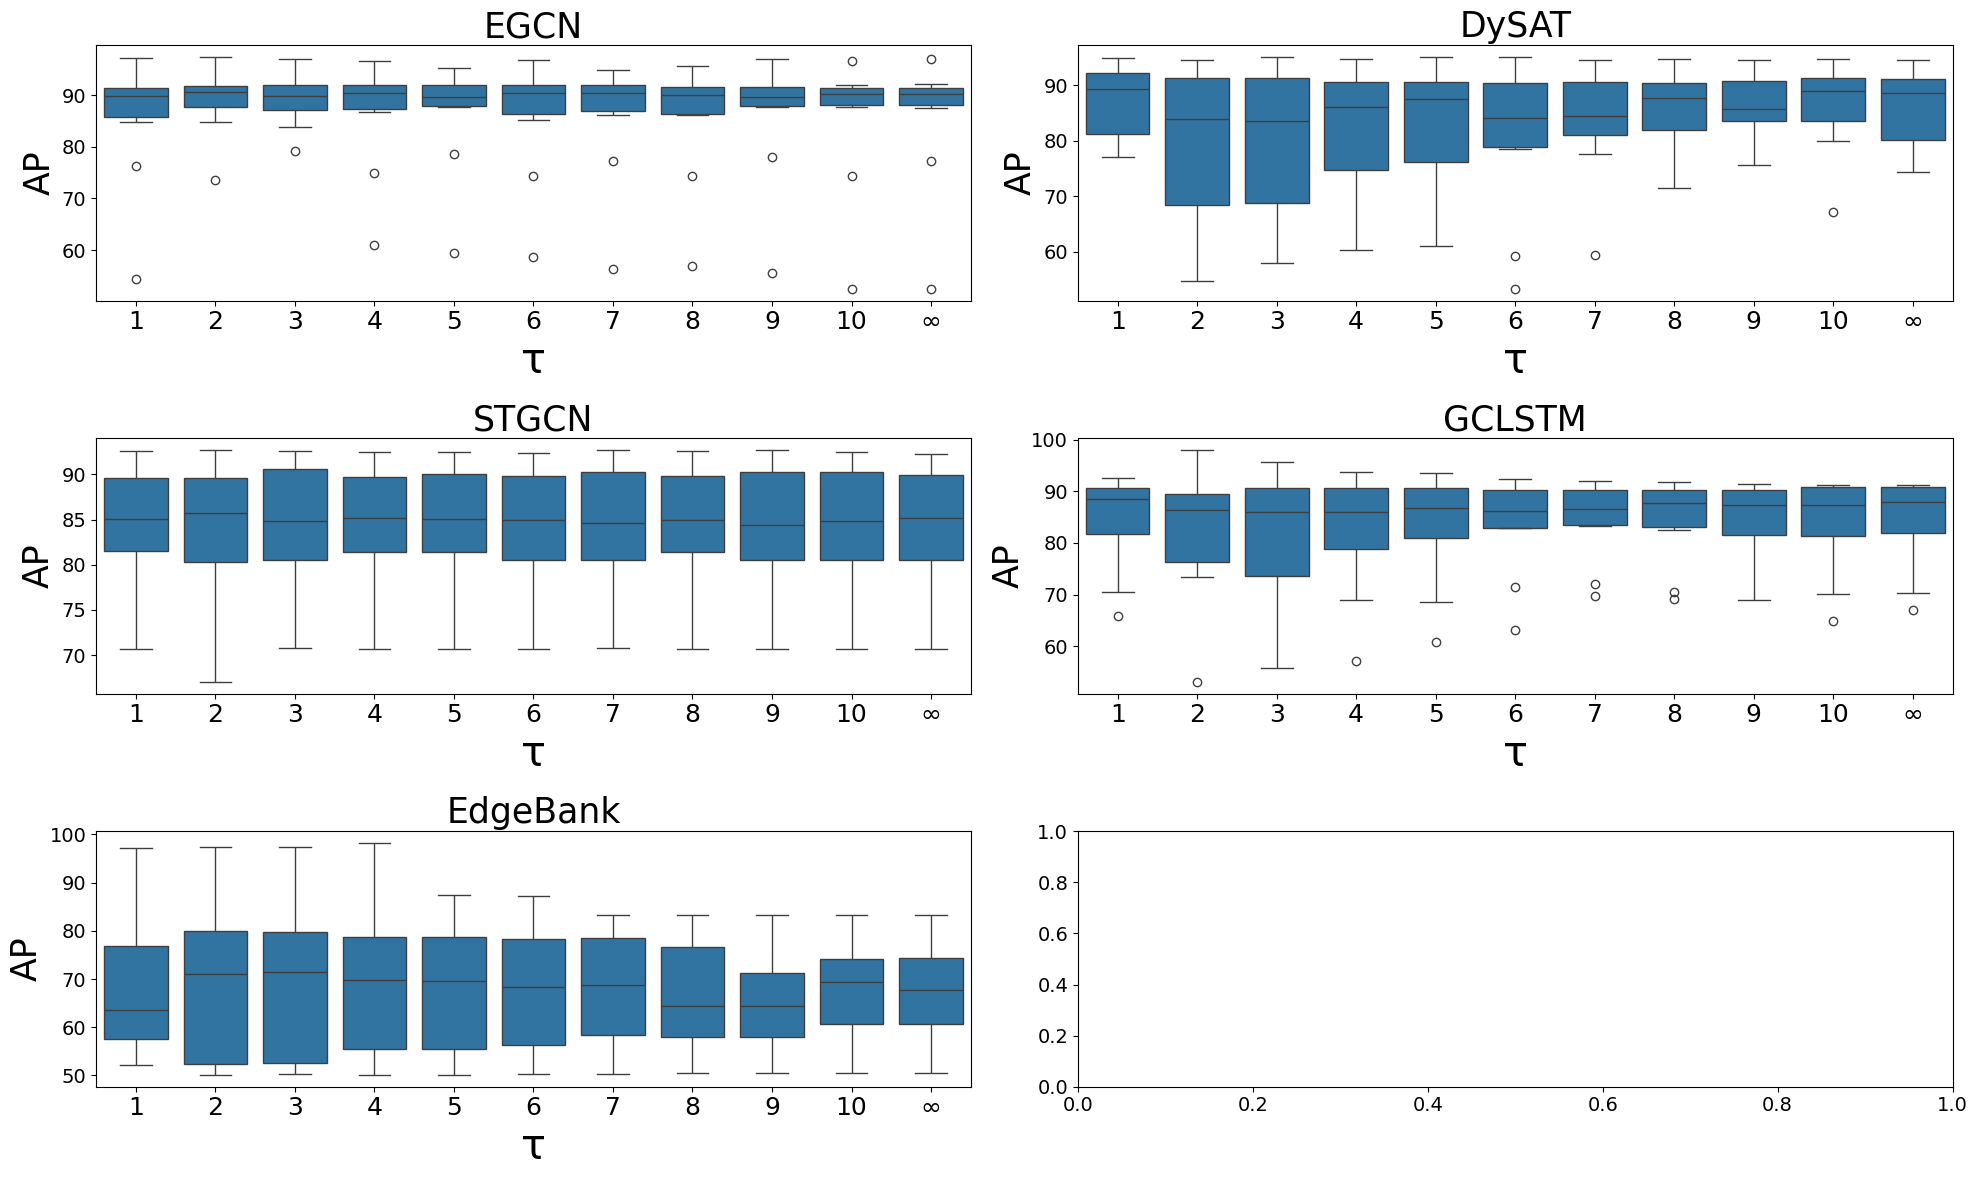

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df_egcn = pd.read_csv('res/egcn.csv')
df_dysat = pd.read_csv('res/dysat.csv')
df_stgcn = pd.read_csv('res/stgcn.csv')
df_gclstm = pd.read_csv('res/gclstm.csv')
df_edgebank = pd.read_csv('res/edgebank.csv')

# Préparer les données pour chaque modèle
models = {
    'EdgeBank': df_edgebank,
    'DySAT': df_dysat,
    'STGCN': df_stgcn,
    'GCLSTM': df_gclstm,
    
}

# Liste des fenêtres temporelles
windows = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1]
window_labels = list(range(1, 11)) + ['∞']

# Créer les box plots pour chaque modèle
fig, axes = plt.subplots(2, 2, figsize=(20, 12), constrained_layout=True)

# Flattener les axes pour itérer facilement
axes = axes.flatten()

for i, (model_name, ax) in enumerate(zip(models.keys(), axes)):
    df = models[model_name]
    df_melted = df.melt(id_vars='W', var_name='Dataset', value_name='Performance')
    
    sns.boxplot(x='W', y='Performance', data=df_melted, ax=ax)
    ax.set_xticks(list(range(len(window_labels))))
    ax.set_xticklabels(window_labels, fontsize=18)
    ax.set_xlabel('τ', fontsize=30)
    ax.set_ylabel('AP', fontsize=25)
    ax.set_title(f'{model_name}', fontsize=25)

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Données de performance des modèles pour τ_inf et τ_opt
data = {
    'Dataset': ['CanParl', 'USLegis', 'Trade', 'UCI-Message', 'UNVote', 'AS733', 'Enron', 'Colab', 'Bitcoin-OTC', 'Bitcoin-Alpha'],
    'EGCN_Inf': [89.70, 90.02, 91.95, 54.33, 84.76, 97.17, 91.58, 90.69, 89.04, 76.19],
    'DySat_Inf': [79.44, 88.36, 92.78, 77.04, 81.60, 94.88, 91.84, 90.20, 92.23, 81.10],
    'GCLSTM_Inf': [70.47, 84.42, 90.15, 87.22, 80.75, 90.86, 91.26, 89.99, 92.65, 65.91],
    'STGCN_Inf': [90.64, 90.95, 92.62, 82.14, 86.49, 86.66, 83.73, 77.68, 81.29, 70.72],
    'EdgeBank_Inf': [54.48, 57.75, 65.94, 76.28, 61.17, 97.21, 79.35, 77.02, 52.18, 57.43],
    'EGCN_Opt': [90.56, 90.74, 92.12, 84.85, 86.96, 97.37, 92.45, 90.86, 89.99, 73.51],
    'DySat_Opt': [83.63, 90.38, 93.13, 80.03, 88.71, 95.07, 91.84, 91.39, 92.23, 81.10],
    'GCLSTM_Opt': [72.06, 86.26, 91.02, 87.22, 84.57, 98.03, 92.35, 90.19, 92.65, 81.70],
    'STGCN_Opt': [90.65, 90.95, 92.72, 82.15, 90.42, 87.06, 84.49, 78.25, 81.29, 70.75],
    'EdgeBank_Opt': [54.93, 73.46, 82.42, 55.06, 97.30, 82.15, 71.53, 70.34, 52.18, 58.67]
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Calculer la différence moyenne pour chaque modèle
models = ['EGCN', 'DySat', 'GCLSTM', 'STGCN', 'EdgeBank']
average_gains = {}

for model in models:
    inf_col = f'{model}_Inf'
    opt_col = f'{model}_Opt'
    df[f'{model}_Gain'] = df[opt_col] - df[inf_col]
    average_gains[model] = df[f'{model}_Gain'].mean()

# Afficher les gains moyens
for model, gain in average_gains.items():
    print(f'Average gain for {model}: {gain:.2f}')


Average gain for EGCN: 3.40
Average gain for DySat: 1.80
Average gain for GCLSTM: 3.24
Average gain for STGCN: 0.58
Average gain for EdgeBank: 1.92
